In [4]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
Crime_type = pd.read_csv('Resources/Crime statistics/Crime_csv.csv',thousands=',')
Crime_loc = pd.read_csv('Resources/Crime statistics/Data_Tables_Criminal_Incidents_csv_loc.csv')

In [6]:
Cleaned_crime_type = Crime_type.drop(columns=['1993','1994','1995','1996','1997','1998','1999(a)','2000','2001','2002','2003','2004','2005','2006','2007(b)','2008(b)','2009(b)(c)(d)','2010(b)(e)','2011','2012','2013','2014','2015','2016','2017','2018(f)']).dropna()

Cleaned_crime_type['2020']=Cleaned_crime_type['2020'].astype(float)
Cleaned_crime_type['2019(g)']=Cleaned_crime_type['2019(g)'].astype(float)


In [7]:
change=(Cleaned_crime_type['2020']-Cleaned_crime_type['2019(g)'])/Cleaned_crime_type['2019(g)']*100 
Cleaned_crime_type['Change']=change
Cleaned_crime_type=Cleaned_crime_type.set_index('Offence')
positive_change=Cleaned_crime_type.loc[Cleaned_crime_type['Change']>=0]
negative_change=Cleaned_crime_type.loc[Cleaned_crime_type['Change']<0]
Cleaned_crime_type['Change']=Cleaned_crime_type['Change'].map('{:,.2%}'.format)
Cleaned_crime_type


,2019(g),2020,Change
Offence,,,
Homicide and related offences(h),415.0,396.0,-457.83%
Murder,225.0,221.0,-177.78%
Attempted murder,145.0,123.0,"-1,517.24%"
Manslaughter,43.0,48.0,"1,162.79%"
Sexual assault(i),26860.0,27505.0,240.13%
Kidnapping/abduction(j),526.0,402.0,"-2,357.41%"
Robbery,11774.0,9409.0,"-2,008.66%"
Armed robbery,5793.0,4746.0,"-1,807.35%"
Unarmed robbery,5982.0,4666.0,"-2,199.93%"


In [8]:
positive_change
# we can see only two types of crime increased


,2019(g),2020,Change
Offence,,,
Manslaughter,43.0,48.0,11.627907
Sexual assault(i),26860.0,27505.0,2.401340
Murder,0.9,0.9,0.000000
Manslaughter,0.2,0.2,0.000000
Sexual assault(i),105.9,107.1,1.133144


In [9]:
negative_change

,2019(g),2020,Change
Offence,,,
Homicide and related offences(h),415.0,396.0,-4.578313
Murder,225.0,221.0,-1.777778
Attempted murder,145.0,123.0,-15.172414
Kidnapping/abduction(j),526.0,402.0,-23.574144
Robbery,11774.0,9409.0,-20.086632
Armed robbery,5793.0,4746.0,-18.073537
Unarmed robbery,5982.0,4666.0,-21.999331
Blackmail/extortion,568.0,522.0,-8.098592
Unlawful entry with intent(k)(l),173347.0,133870.0,-22.773397


No handles with labels found to put in legend.


Text(0, 0.5, 'Crime change rate(%)')

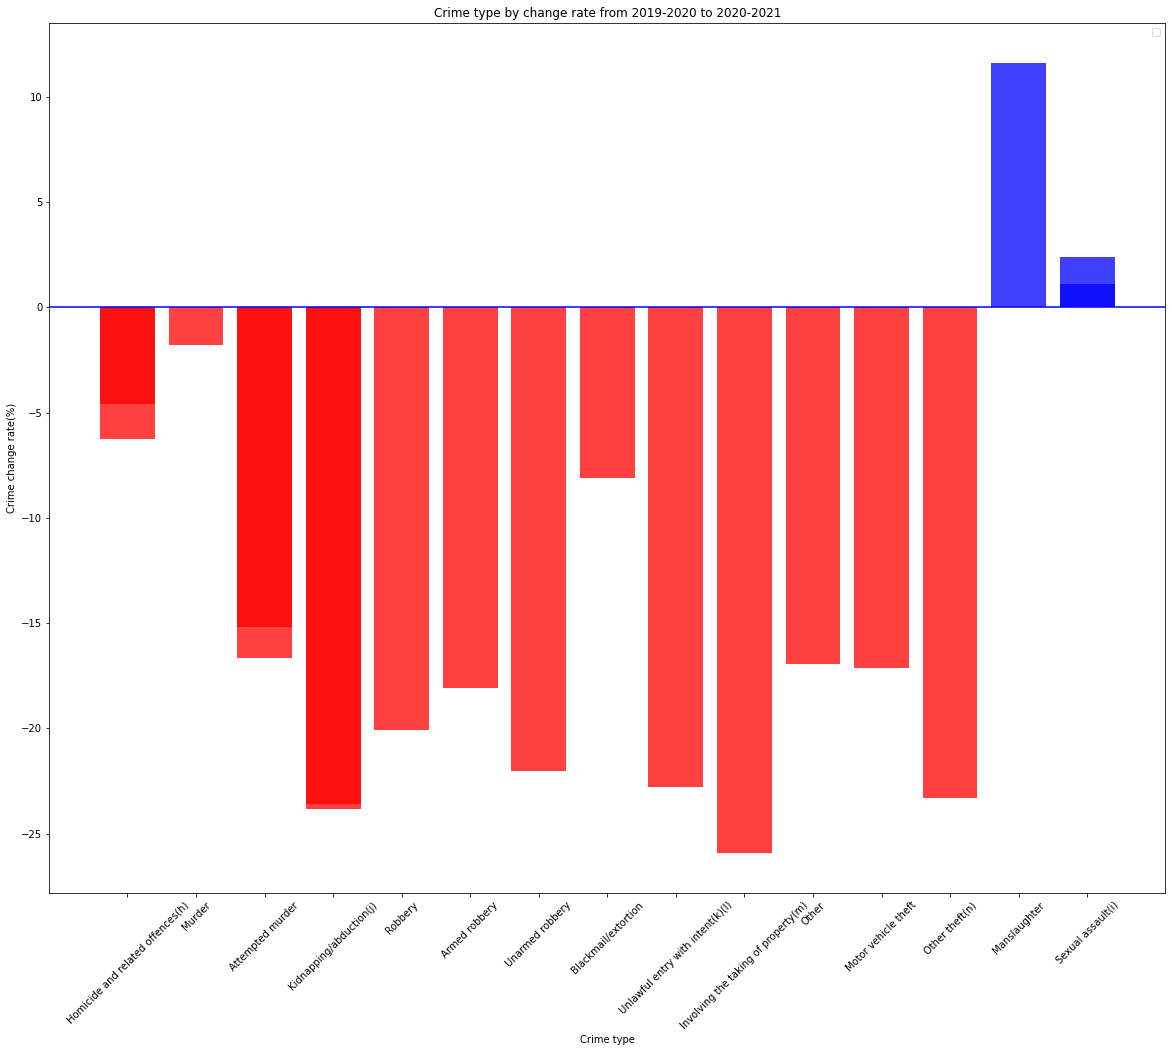

In [10]:
fig=plt.figure(figsize=(20,16))


plt.bar(negative_change.index,negative_change.Change,color='red',alpha=0.75)
plt.bar(positive_change.index,positive_change.Change,color='blue',alpha=0.75)
# plt.xticks(new_csv['Location type'],rotation=45)
plt.axhline(y=0, color='b', linestyle='-')
plt.xticks(rotation=45)

plt.legend()
plt.title('Crime type by change rate from 2019-2020 to 2020-2021')
plt.xlabel('Crime type')
plt.ylabel('Crime change rate(%)')

In [11]:
Crime_loc = Crime_loc.dropna()

In [12]:
Crime_2021 = Crime_loc.loc[(Crime_loc['Year']==2021.0)]
Crime_2020 = Crime_loc.loc[(Crime_loc['Year']==2020.0)]

In [13]:
Crime_2020 = Crime_2020.drop(columns=["Year ending","Location Group",'Offence Division',"Offence Subgroup"])
Crime_2021 = Crime_2021.drop(columns=["Year ending","Location Group",'Offence Division',"Offence Subgroup"])

In [14]:
Crime_2020_group = Crime_2020.groupby(["Location Subdivision","Offence Subdivision"])
Crime_2020_clean = Crime_2020_group["Incidents Recorded"].sum().to_frame().reset_index()
Crime_2020_clean.to_csv('Resources/Crime_2020_clean.csv')

In [15]:
crime_2020_location=Crime_2020_clean.groupby("Location Subdivision")['Incidents Recorded'].sum().to_frame().rename(columns={Crime_2020_clean.columns[0]:'Count'})
crime_2020_location
crime_2020_location.to_csv('resources/crime_2020_location.csv')

In [16]:
Crime_2021_group = Crime_2021.groupby(["Location Subdivision","Offence Subdivision"])
Crime_2021_clean = Crime_2021_group["Incidents Recorded"].sum().to_frame().reset_index()
Crime_2021_clean.to_csv('Resources/Crime_2021_clean.csv')

In [17]:
Crime_2021_location=Crime_2021_clean.groupby('Location Subdivision')['Incidents Recorded'].sum().to_frame().rename(columns={Crime_2021_clean.columns[0]:'Count'})
Crime_2021_location

,Incidents Recorded
Location Subdivision,
11 Dwelling - private,121841.0
12 Dwelling - non-private,5012.0
13 Grounds/surrounding land,42494.0
21 Education,3916.0
22 Health,2619.0
23 Religious,557.0
24 Public Transport,9380.0
25 Other Transport,11272.0
26 Justice,7440.0


In [18]:
Crime_2021_location.to_csv('resources/Crime_2021_by_location.csv')

In [19]:
new_csv=Crime_2021_location.merge(crime_2020_location,on=Crime_2021_location.index,how='outer',suffixes=('_2021', '_2020'))
new_csv=new_csv.rename(columns={'key_0':'Location type'})
new_csv

,Location type,Incidents Recorded_2021,Incidents Recorded_2020
0,11 Dwelling - private,121841.0,122039.0
1,12 Dwelling - non-private,5012.0,4468.0
2,13 Grounds/surrounding land,42494.0,44119.0
3,21 Education,3916.0,5795.0
4,22 Health,2619.0,3197.0
5,23 Religious,557.0,916.0
6,24 Public Transport,9380.0,11162.0
7,25 Other Transport,11272.0,13162.0
8,26 Justice,7440.0,12968.0
9,27 Open Space,7707.0,7448.0


Text(0, 0.5, 'Incidents recorded')

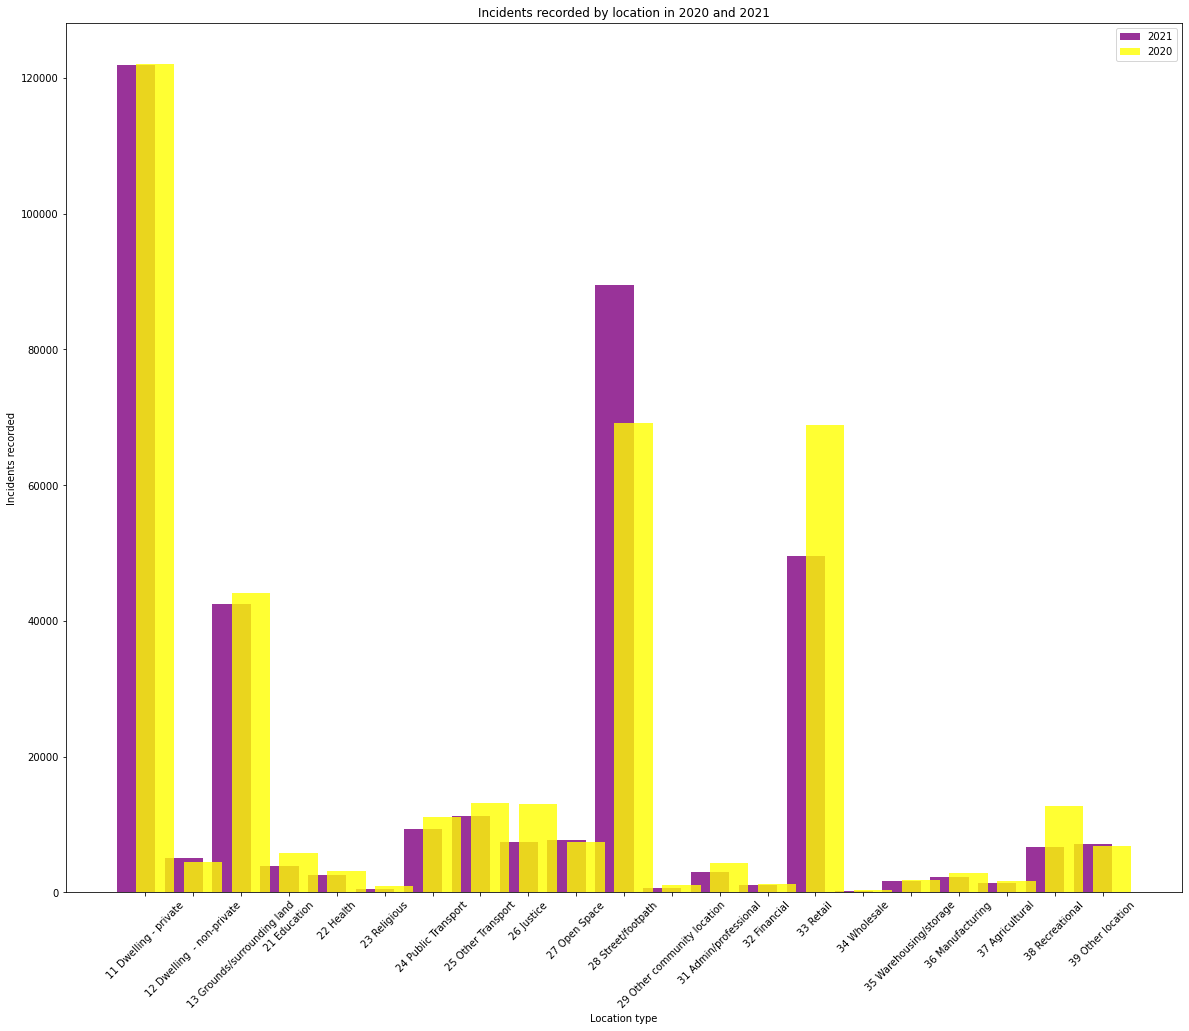

In [20]:
fig=plt.figure(figsize=(20,16))
y1=new_csv['Incidents Recorded_2021']
y2=new_csv['Incidents Recorded_2020']
x=new_csv['Location type']
x_axis= np.arange(len(x))

plt.bar(x_axis-0.2,y1,color='purple',alpha=0.8,label='2021')
# plt.xticks(new_csv['Location type'],rotation=45)
plt.bar(x_axis+0.2,y2,color='yellow',alpha=0.8,label='2020')
plt.xticks(x_axis, x,rotation=45)
plt.legend()
plt.title('Incidents recorded by location in 2020 and 2021')
plt.xlabel('Location type')
plt.ylabel('Incidents recorded')

In [21]:
stats.ttest_ind(y1, y2, equal_var=False)
print(y1)

0     121841.0
1       5012.0
2      42494.0
3       3916.0
4       2619.0
5        557.0
6       9380.0
7      11272.0
8       7440.0
9       7707.0
10     89541.0
11       680.0
12      3008.0
13      1005.0
14     49502.0
15       233.0
16      1627.0
17      2223.0
18      1383.0
19      6713.0
20      7085.0
Name: Incidents Recorded_2021, dtype: float64


In [22]:
x=new_csv['Location type']['']

plt.bar(x_axis-0.2,y1,color='purple',alpha=0.8,label='2021')

KeyError: ''